### CS559 - Homework #2

**Author**: Sid Bhatia

**Date**: September 18th, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

#### 1. Naive Bayes Classification [40 pts]

Use the following code to generate the train data set. The code will generate a random data set with four features and classes.

```python
from sklearn import datasets
X, y = datasets.make_blobs(n_samples = 400, n_features = 5, centers = 4, cluster_std = 2, random_state = 100)
```

a. [5pts] Compute the prior probability of each class, $p(C_k), \; \forall \, k = 1, ..., 4$.

In [18]:
from sklearn import datasets
import numpy as np

X, y = datasets.make_blobs(n_samples = 400, n_features = 5, centers = 4, cluster_std = 2, random_state = 100)

unique_classes, counts = np.unique(y, return_counts=True)
prior_probabilities = counts / len(y)

print(prior_probabilities)

[0.25 0.25 0.25 0.25]


b. [10pts] Compute the likelihood $p(X \mid C_k), \; \forall \, 1, ..., 4.$

In [19]:
from scipy.stats import multivariate_normal

class_means = {}
class_covariances = {}
class_likelihoods = {}

for cls in unique_classes:

    X_cls = X[y == cls]
    
    mean_cls = np.mean(X_cls, axis=0)
    class_means[cls] = mean_cls
    
    cov_cls = np.cov(X_cls, rowvar=False)
    class_covariances[cls] = cov_cls
    
    likelihood_cls = multivariate_normal.pdf(X, mean=mean_cls, cov=cov_cls)
    class_likelihoods[cls] = likelihood_cls

    # print(f"\nClass {cls + 1} Mean Vector:\n{mean_cls}")
    # print(f"\nClass {cls + 1} Covariance Matrix:\n{cov_cls}")
    print(f"\nLikelihoods p(X | C_{cls + 1}):\n{likelihood_cls}")


Likelihoods p(X | C_1):
[5.09197236e-19 9.50612419e-19 1.41933448e-04 1.88275100e-16
 2.38657046e-25 7.29170761e-39 2.43027345e-20 8.17664284e-31
 3.26195346e-33 6.85670933e-24 5.78523664e-06 3.60430084e-22
 7.63069571e-23 1.72159590e-18 2.25937526e-05 2.30055471e-19
 1.16451071e-20 2.48679170e-21 5.07156819e-35 7.60305205e-17
 3.33809017e-24 3.33218481e-32 1.81842343e-31 1.14384989e-19
 1.47678746e-30 4.44560186e-19 1.39904274e-31 5.78745571e-06
 1.13347716e-21 3.92274007e-05 1.70100195e-21 9.77184782e-19
 8.87339315e-05 9.08519999e-06 7.59823498e-25 1.70267266e-07
 7.42463459e-29 9.07741727e-21 5.30840745e-34 2.27405539e-22
 6.42801233e-32 2.52838036e-14 2.41139892e-21 6.48094751e-05
 2.08289315e-04 3.38862891e-16 4.93226655e-28 4.55649828e-24
 2.57241829e-24 3.90905967e-32 3.81471713e-20 3.57734601e-28
 3.05998922e-26 1.27978072e-29 1.55396506e-17 1.69126268e-33
 6.81796607e-05 4.80211010e-33 6.03954106e-17 5.61737488e-20
 2.80132538e-20 9.51046379e-07 4.78818295e-17 3.89533155e-33

c. [15pts] Compute the posterior probability of each point $p(C_k \mid X), \; \forall \, k = 1, ..., 4$. Assign the class ID to each point.

In [20]:
num_classes = len(unique_classes)
num_samples = X.shape[0]

posterior_probabilities = np.zeros((num_samples, num_classes))
for idx, cls in enumerate(unique_classes):
    prior = prior_probabilities[cls]
    likelihood = class_likelihoods[cls]
    posterior_probabilities[:, idx] = likelihood * prior

posterior_probabilities_sum = np.sum(posterior_probabilities, axis=1, keepdims=True)
posterior_probabilities_normalized = posterior_probabilities / posterior_probabilities_sum

predicted_classes = np.argmax(posterior_probabilities_normalized, axis=1)
predicted_class_labels = unique_classes[predicted_classes]

for i in range(5):
    print(f"\nData Point {i + 1}:")
    print(f"True Class: {y[i] + 1}")
    for idx, cls in enumerate(unique_classes):
        print(f"p(C_{cls + 1} | x_{i + 1}) = {posterior_probabilities_normalized[i, idx]:.4f}")
    print(f"Assigned Class: {predicted_class_labels[i] + 1}")


Data Point 1:
True Class: 4
p(C_1 | x_1) = 0.0000
p(C_2 | x_1) = 0.0000
p(C_3 | x_1) = 0.0000
p(C_4 | x_1) = 1.0000
Assigned Class: 4

Data Point 2:
True Class: 3
p(C_1 | x_2) = 0.0000
p(C_2 | x_2) = 0.0000
p(C_3 | x_2) = 1.0000
p(C_4 | x_2) = 0.0000
Assigned Class: 3

Data Point 3:
True Class: 1
p(C_1 | x_3) = 1.0000
p(C_2 | x_3) = 0.0000
p(C_3 | x_3) = 0.0000
p(C_4 | x_3) = 0.0000
Assigned Class: 1

Data Point 4:
True Class: 4
p(C_1 | x_4) = 0.0000
p(C_2 | x_4) = 0.0000
p(C_3 | x_4) = 0.0000
p(C_4 | x_4) = 1.0000
Assigned Class: 4

Data Point 5:
True Class: 4
p(C_1 | x_5) = 0.0000
p(C_2 | x_5) = 0.0000
p(C_3 | x_5) = 0.0000
p(C_4 | x_5) = 1.0000
Assigned Class: 4


d. [5pts] Construct the confusion matrix to show the classification rate using `sklearn.metrics.confusion_matrix`. The confusion matrix should visualize and summarize the performance of a classification algorithm.

In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predicted_class_labels)

print(conf_matrix)

[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]


e. [5pts] Classify the target using `sklearn.native_bayes.GaussianNB`. Report the accuracy of the model.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X, y)

y_pred = gnb.predict(X)

accuracy = accuracy_score(y, y_pred)

print(accuracy)

1.0


#### 2. Perceptron [30 pts]

a. [15pts] In the lecture slide, the methods needed for the perceptron algorithm are provided: `step(X)` and `perceptron_predict(w, X)`. Write a method (`Perceptron_fit(w, X, y, learning_rate, iteration`) that fits the data and returns `w`.

In [24]:
def step(X):
    return 1 if X > 0 else -1

def perceptron_predict(w, X):
    return step(np.dot(np.append(1, X), w))

def perceptron_fit(w, X, y, learning_rate, iterations):

    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    for j in range(iterations):

        for k in range(len(y)):

            h = step(np.dot(X_bias[k], w))
            
            if h != y[k]:

                error = y[k] - h
                
                w += learning_rate * error * X_bias[k]
                
    return w

b. [10pts] Create a sample of $X$ in Question 1 whose $y \in \{0, 1\}$. Fit the sample data and find $w$ when the learning rate is 0.001 and the iteration is 1. The learning rate and iteration numbers can be tuned to increase the performance if necessary.

In [25]:
y_binary = np.where((y == 0) | (y == 1), 0, 1)

w_init_binary = np.zeros(6)

learning_rate_binary = 0.001
iterations_binary = 1

w_trained_binary = perceptron_fit(w_init_binary, X, y_binary, learning_rate_binary, iterations_binary)

w_trained_binary

array([ 0.036     , -0.00103401,  0.0073094 ,  0.00041277, -0.01454153,
        0.00130611])

c. [5pts] Use the final $w$ from 2(b) to classify all observations in $X$. Measure the performance and explain the success. Discuss what other tests can be done in order to improve the classification for $X$.

In [26]:
def classify(X, w):
    predictions = []
    for i in range(X.shape[0]):
        prediction = perceptron_predict(w, X[i])
        predictions.append(prediction)
    return np.array(predictions)

y_pred_binary = classify(X, w_trained_binary)

y_pred_binary = np.where(y_pred_binary > 0, 1, 0)

accuracy_binary = accuracy_score(y_binary, y_pred_binary)

print(accuracy_binary)

0.5525


The model achieves an accuracy of around 55.25%, suggesting limited success. To improve performance, several steps can be taken: increasing the number of iterations to allow better convergence, tuning the learning rate for more effective weight updates, and applying feature scaling (normalization or standardization) to handle feature magnitude differences. Additionally, considering non-linear models such as Support Vector Machines (SVM) or neural networks could help capture more complex relationships. Finally, using cross-validation to fine-tune hyperparameters can further optimize the model’s performance.

#### 3. Logistic Regression Regularization [30pts]

One of the ways to avoid overfitting is by **regularizing** the weights. In this problem, we will observe how the model gets regularized using the same data set from Question 1.

a. [10pts] Regularize a `sklearn.linear_model.LogisticRegression` model with a hyperparameter **penalty** `= l1` (Lasso Regularization). In the regularization validation, there is a hyperparameter to be concerned about. The model needs to be trained iteratively by tunning a hyperparameter, $C = \lambda^{-1}$, whose default value is 1. A hyperparameter **solver** `= saga`, which is one of the fastest convergence solver for any regularization in LogisticRegression(), must be used when 'l1' penalty parameter is used.

```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l1', solver = 'saga', C = 1.0)
...
w, w0 = clf.coef_, clf.intercept_
```

Make a plot of $w$ vs. $C$ to show the convergence of $w$ as $C$ changes.

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\P

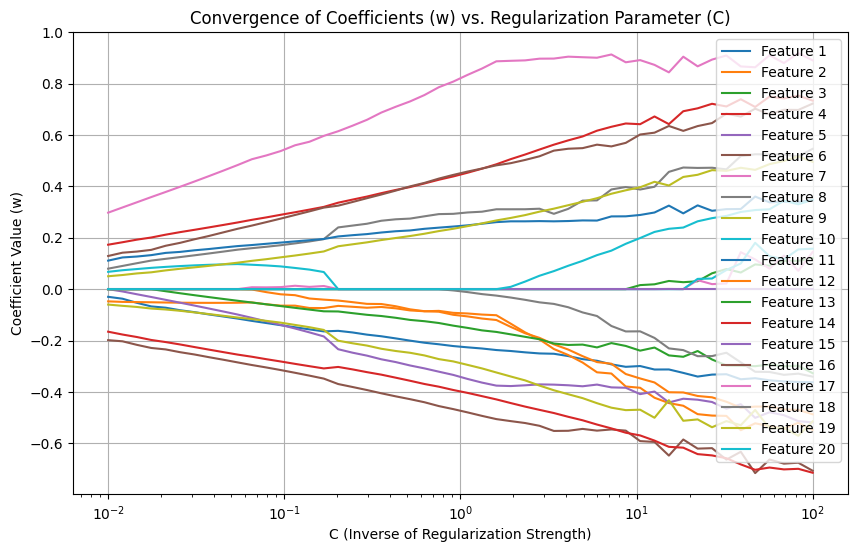

In [27]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_values = np.logspace(-2, 2, 50)

coefficients = []

for C in C_values:
    clf = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=1000)
    clf.fit(X, y)
    coefficients.append(clf.coef_.flatten())

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(C_values, coefficients[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Coefficient Value (w)')
plt.title('Convergence of Coefficients (w) vs. Regularization Parameter (C)')
plt.legend()
plt.grid(True)
plt.show()

b. [10pts] Explain which feature is the most important in each class.

In [28]:
X, y = datasets.make_blobs(n_samples=400, n_features=5, centers=4, cluster_std=2, random_state=100)

clf = LogisticRegression(penalty='l1', solver='saga', C=1.0, multi_class='multinomial', max_iter=1000)
clf.fit(X, y)

coefficients = clf.coef_

most_important_features = np.argmax(np.abs(coefficients), axis=1)

for class_idx in range(len(clf.classes_)):
    feature_idx = most_important_features[class_idx]
    print(f"Class {clf.classes_[class_idx]}: Most important feature is Feature {feature_idx + 1} with coefficient {coefficients[class_idx, feature_idx]:.4f}")

Class 0: Most important feature is Feature 4 with coefficient 0.4462
Class 1: Most important feature is Feature 1 with coefficient -0.4739
Class 2: Most important feature is Feature 4 with coefficient -0.3977
Class 3: Most important feature is Feature 2 with coefficient 0.8214


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The most important features for each class were identified using a logistic regression model with L1 regularization. The coefficients for these features indicate their influence on class prediction. For Class 0, Feature 4 has a positive coefficient of 0.4465, suggesting that higher values of this feature increase the likelihood of an observation being classified into Class 0. In Class 1, Feature 1 has the most impact with a negative coefficient (-0.4747), implying that an increase in this feature's value decreases the likelihood of the observation being in Class 1. Similarly, for Class 2, Feature 4 is the most important with a negative impact (-0.3967), and for Class 3, Feature 2 has the highest positive influence (0.8246).

c. [10pts] Implement 3(a) to show that Ridge regularization (penalty = 'l2') does not provide a sparse solution.

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


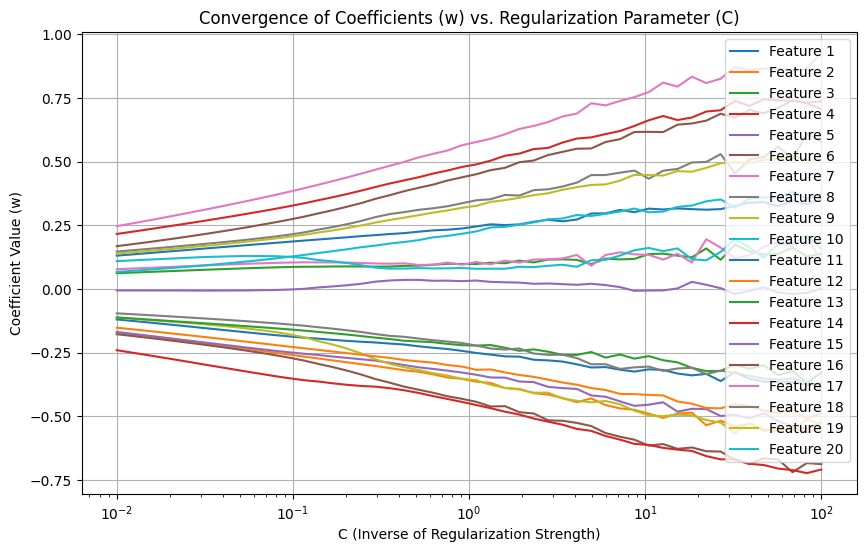

In [29]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_values = np.logspace(-2, 2, 50)

coefficients = []

for C in C_values:
    clf = LogisticRegression(penalty='l2', solver='saga', C=C, max_iter=1000)
    clf.fit(X, y)
    coefficients.append(clf.coef_.flatten())

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(C_values, coefficients[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Coefficient Value (w)')
plt.title('Convergence of Coefficients (w) vs. Regularization Parameter (C)')
plt.legend()
plt.grid(True)
plt.show()